In [1]:
!pip install plotly

     -------------------------------------- 15.6/15.6 MB 973.8 kB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [4]:
tesla=pd.read_csv("data/datasetsandcodefilesstockmarketprediction/tesla.csv")

In [5]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [6]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [7]:
tesla["Date"]=pd.to_datetime(tesla["Date"])

C:\Users\manav\AppData\Local\Temp\ipykernel_15624\2747346091.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [8]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:
print(f'Stock data between{tesla.Date.min()} and {tesla.Date.max()}')
print(f"Total days = {tesla.Date.max()-tesla.Date.min()}")

Stock data between2010-06-29 00:00:00 and 2019-03-15 00:00:00
Total days = 3181 days 00:00:00


In [10]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


<Axes: >

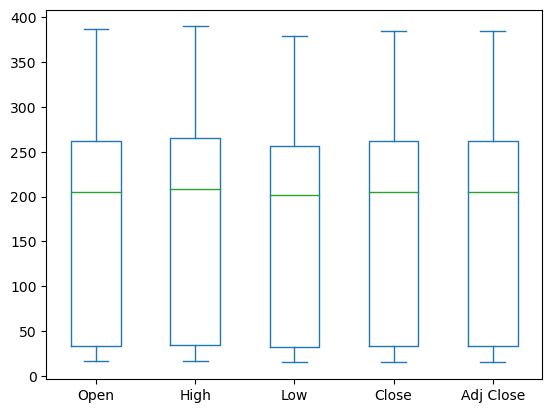

In [13]:
tesla[["Open","High","Low","Close","Adj Close"]].plot(kind="box")

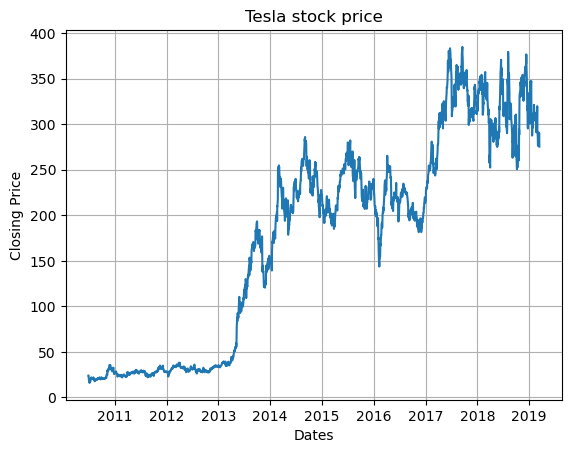

In [21]:
plt.plot(tesla['Date'],tesla["Close"])
plt.title("Tesla stock price")
plt.xlabel("Dates")
plt.ylabel("Closing Price")
plt.grid()
plt.show()

# USING LSTM ON GOOGLE STOCK DATA 

In [24]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [39]:
data=pd.read_csv("data/datasetsandcodefilesstockmarketprediction/Google_train_data.csv")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [41]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [42]:
data["Date"]=pd.to_datetime(data["Date"])

In [43]:
data.isnull().sum()
# data.dropna()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [97]:
trainData=data.iloc[:,4:5].values

In [98]:
trainData=pd.DataFrame(trainData)

In [104]:
trainData.apply(lambda x:x.replace(",",""))

,0
0,663.59
1,666.45
2,657.21
3,648.24
4,620.76
...,...
1253,789.91
1254,791.55
1255,785.05
1256,782.79


In [106]:
trainData.dtypes

0    object
dtype: object

In [109]:
trainData[0] = trainData[0].str.replace(',', '')
trainData[0] = trainData[0].astype(float)

In [107]:
sc=MinMaxScaler(feature_range=(0,1))

In [110]:
trainData=sc.fit_transform(trainData)
trainData.shape

(1258, 1)

In [111]:
trainData

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [112]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [113]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [157]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mean_squared_error")

In [158]:
hist=model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
38/38 - 16s - loss: 0.0234 - 16s/epoch - 423ms/step
Epoch 2/20
38/38 - 8s - loss: 0.0092 - 8s/epoch - 201ms/step
Epoch 3/20
38/38 - 9s - loss: 0.0070 - 9s/epoch - 226ms/step
Epoch 4/20
38/38 - 9s - loss: 0.0059 - 9s/epoch - 232ms/step
Epoch 5/20
38/38 - 8s - loss: 0.0059 - 8s/epoch - 211ms/step
Epoch 6/20
38/38 - 8s - loss: 0.0044 - 8s/epoch - 204ms/step
Epoch 7/20
38/38 - 8s - loss: 0.0048 - 8s/epoch - 221ms/step
Epoch 8/20
38/38 - 8s - loss: 0.0043 - 8s/epoch - 205ms/step
Epoch 9/20
38/38 - 8s - loss: 0.0050 - 8s/epoch - 210ms/step
Epoch 10/20
38/38 - 8s - loss: 0.0040 - 8s/epoch - 222ms/step
Epoch 11/20
38/38 - 9s - loss: 0.0038 - 9s/epoch - 224ms/step
Epoch 12/20
38/38 - 8s - loss: 0.0036 - 8s/epoch - 221ms/step
Epoch 13/20
38/38 - 8s - loss: 0.0038 - 8s/epoch - 207ms/step
Epoch 14/20
38/38 - 8s - loss: 0.0035 - 8s/epoch - 210ms/step
Epoch 15/20
38/38 - 7s - loss: 0.0037 - 7s/epoch - 180ms/step
Epoch 16/20
38/38 - 7s - loss: 0.0032 - 7s/epoch - 192ms/step
Epoch 17/20
38/

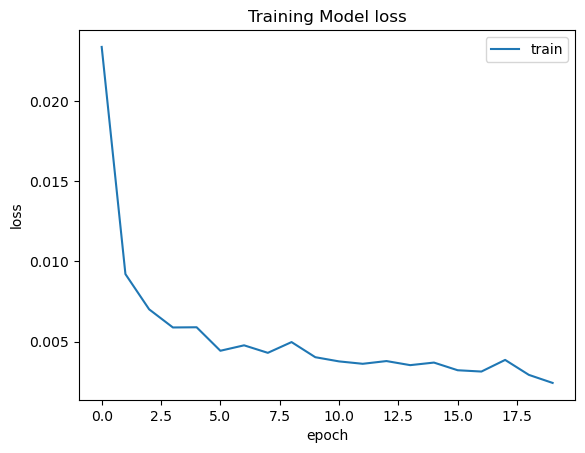

In [160]:
plt.plot(hist.history["loss"])
plt.title("Training Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train"],loc="upper right")
plt.show()

In [161]:
testData=pd.read_csv("data/datasetsandcodefilesstockmarketprediction/Google_test_data.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors="coerce")
# testData["Close"] = testData["Close"].str.replace(',', '')
# testData["Close"] = testData["Close"].astype(float)
testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values

#INPUT:
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [162]:
y_pred=model.predict(X_test)

6/6 [==============================] - 3s 73ms/step


In [163]:
y_pred.shape

(192, 1)

In [164]:
predicted_price=sc.inverse_transform(y_pred)

In [165]:
predicted_price.shape

(192, 1)

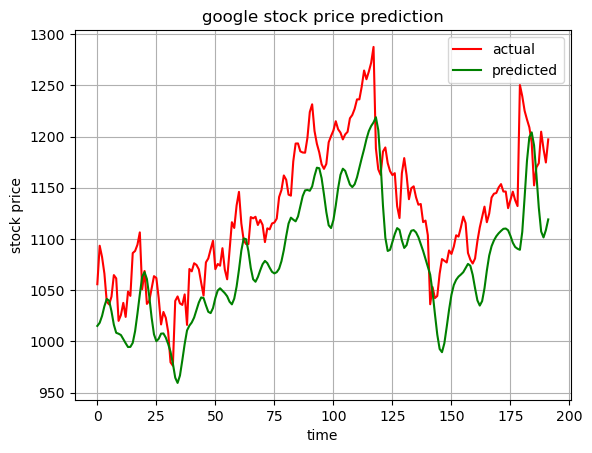

In [166]:
plt.plot(y_test,color="red",label="actual")
plt.plot(predicted_price,color="green",label="predicted")
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("stock price")
plt.legend()
plt.grid()
plt.show()